In [19]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [1]:
import utils
#from utils import read_json, group_by, normalize_module_name

In [2]:
!ls .benchmarks/Linux-CPython-3.13-64bit

0001_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_141508.json
0002_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_141729_uncommited-changes.json
0003_bdee3dd16ab297ff92cb0864fee5634d73f7b7a2_20250814_143804_uncommited-changes.json
0004_15c20ae32831462f001f2fa1e29e7a8ecafcb0de_20250814_144336_uncommited-changes.json
0005_15c20ae32831462f001f2fa1e29e7a8ecafcb0de_20250814_145121_uncommited-changes.json


In [9]:
base_path = os.path.join(os.getcwd(), ".benchmarks/Linux-CPython-3.13-64bit")
fname = os.path.join(base_path, "0005_15c20ae32831462f001f2fa1e29e7a8ecafcb0de_20250814_145121_uncommited-changes.json")

lst = utils.read_json(fname, machine="gonzales")

In [12]:
# normalize the backend names
for elem in lst:
    elem["params"]["xp"] = utils.normalize_module_name(elem["params"]["xp"])

In [13]:
grouped_xp = utils.group_by(lst, lambda x: x["params"]["xp"])

In [31]:
backends = grouped_xp.keys()
backends

dict_keys(['numpy', 'jax.numpy', 'torch'])

In [23]:
group_numpy = grouped_xp['numpy']
type(group_numpy)

list

In [25]:
group_numpy[0]
    

{'group': None,
 'name': 'test_matmul[cpu-numpy-10]',
 'fullname': 'matmul_bench.py::test_matmul[cpu-numpy-10]',
 'params': {'device': 'cpu', 'xp': 'numpy', 'N': 10},
 'param': 'cpu-numpy-10',
 'extra_info': {},
 'options': {'disable_gc': True,
  'timer': 'perf_counter',
  'min_rounds': 7,
  'max_time': 2.0,
  'min_time': 0.2,
  'warmup': 10},
 'stats': {'min': 1.3790188516157721e-06,
  'max': 1.5058973805089093e-06,
  'mean': 1.4074061708092752e-06,
  'stddev': 3.685203551007147e-08,
  'rounds': 10,
  'median': 1.3948326057140437e-06,
  'iqr': 1.9055404960866305e-08,
  'q1': 1.3900201319565354e-06,
  'q3': 1.4090755369174017e-06,
  'iqr_outliers': 1,
  'stddev_outliers': 1,
  'outliers': '1;1',
  'ld15iqr': 1.3790188516157721e-06,
  'hd15iqr': 1.5058973805089093e-06,
  'ops': 710526.9400836776,
  'total': 1.4074061708092752e-05,
  'data': [1.3900201319565354e-06,
   1.3940794164659304e-06,
   1.399513635338488e-06,
   1.395585794962157e-06,
   1.3790188516157721e-06,
   1.392818103742

In [28]:
[(x["params"]["N"], x["stats"]["median"]) for x in group_numpy]

[(10, 1.3948326057140437e-06),
 (20, 1.8210245381535712e-06),
 (50, 5.205499660223722e-06),
 (100, 1.7695714291990135e-05),
 (200, 0.00011671088238810674),
 (500, 0.001816446008569185)]

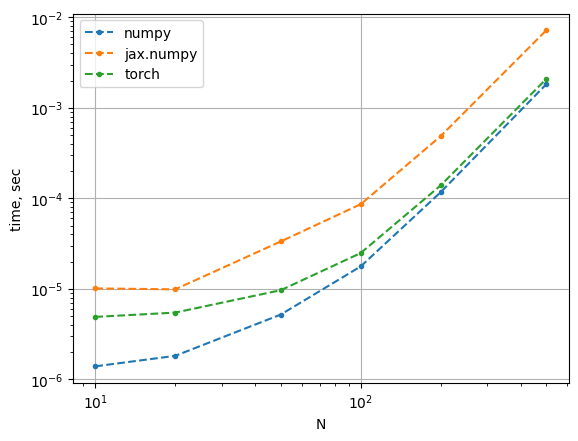

In [39]:
fig, ax = plt.subplots(1, 1)

for backend, group in grouped_xp.items():
    data = [(x["params"]["N"], x["stats"]["median"]) for x in group]
    x, y = np.asarray(data).T
    ax.plot(x, y, '.--', label=backend)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('time, sec')
ax.set_xlabel('N')
ax.grid(True)
ax.legend(loc='best')